# Network Intrusion Detection using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/original.csv')

In [3]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


In [4]:
df.info

<bound method DataFrame.info of             id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp       -   FIN      6      4     258     172   
1            2  0.649902   tcp       -   FIN     14     38     734   42014   
2            3  1.623129   tcp       -   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp       -   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_

In [5]:
df[df['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [6]:
df['service'].replace('-',np.nan,inplace=True)

In [7]:
df.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [8]:
df.shape

(175341, 45)

In [9]:
df.dropna(inplace=True)

In [10]:
df['attack_cat'].value_counts()

Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: attack_cat, dtype: int64

In [11]:
df['state'].value_counts()

INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: state, dtype: int64

In [12]:
features = pd.read_csv('data/features.csv')

In [13]:
features.head(10)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [14]:
features['Type '] = features['Type '].str.lower()

In [15]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [16]:
# selecting common column names from dataset and feature dataset
cols = df.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [17]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(df[c])

In [18]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(df[c])

In [19]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(df[c])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81

In [21]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# Data Visualization

## Binary Classification

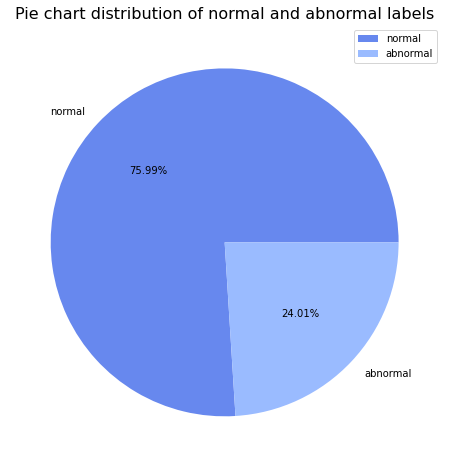

In [22]:
palette_color = sns.color_palette('coolwarm')
plt.figure(figsize=(8,8))
plt.pie(df.label.value_counts(),labels=['normal','abnormal'], colors=palette_color,autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

## Multi-class Classification

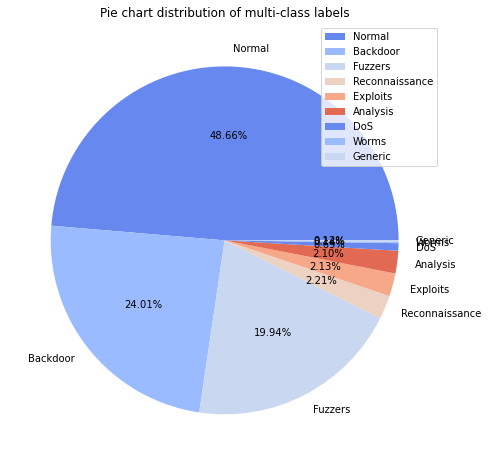

In [23]:
plt.figure(figsize=(8,8))
plt.pie(df.attack_cat.value_counts(),labels=df.attack_cat.unique(),colors=palette_color,autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

# One hot encoding

In [24]:
num_col = df.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = df.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [25]:
# creating a dataframe with only categorical attributes
df_cat = df[cat_col].copy()
df_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [26]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
df_cat = pd.get_dummies(df_cat,columns=cat_col)

In [27]:
df_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
df.shape

(81173, 45)

In [29]:
df=pd.concat([df,df_cat], axis=1)

In [30]:
df.shape

(81173, 64)

In [31]:
df.drop(columns=cat_col,inplace=True)
df.shape

(81173, 61)

# Data Normalization

In [32]:
# selecting numeric attributes columns from data
num_col = list(df.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [33]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(data,col):
  for i in col:
    arr = data[i]
    arr = np.array(arr)
    data[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return data

In [34]:
# data before normalization
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [35]:
# calling normalization() function
df = normalization(df.copy(),num_col)
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Label Encoding

### Binary Labels

In [36]:
bin_label = pd.DataFrame(df.label.map(lambda x:'normal' if x==0 else 'abnormal'))
bin_data = df.copy()
bin_data['label'] = bin_label

In [37]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [38]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

### Multi-class Labels

In [39]:
multi_data = df.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [40]:
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [41]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

## Correlation Matrix

In [42]:
num_col.append('label')

### Binary labels 


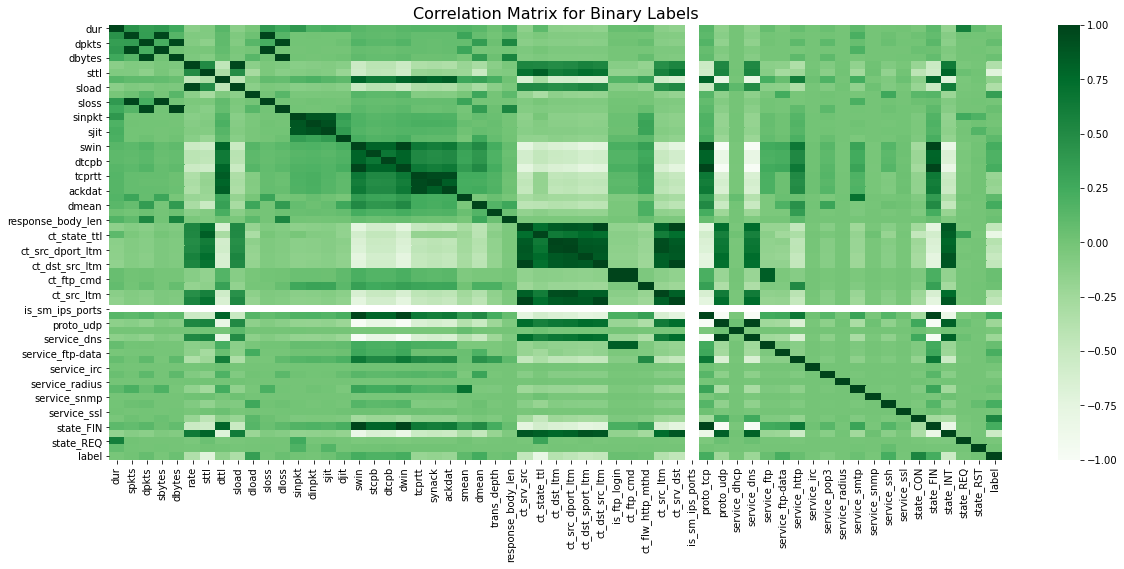

In [43]:
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False, cmap='Greens')
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

### Multi-class labels

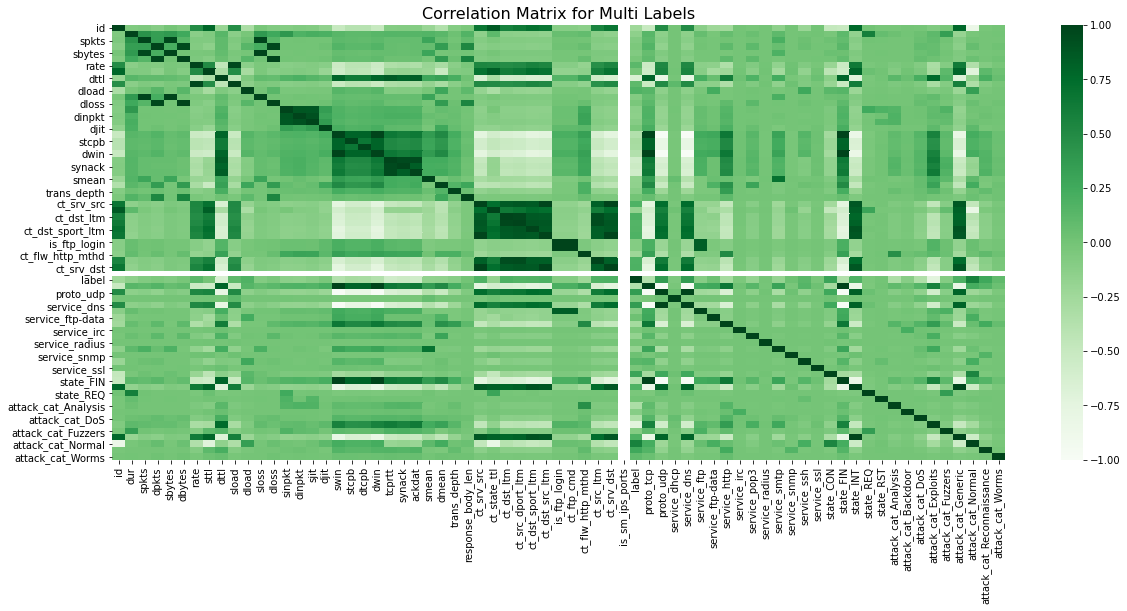

In [44]:
num_col = list(multi_data.select_dtypes(include='number').columns)
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False, cmap='Greens')
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.show()

# Feature selection

### Binary labels

In [45]:
# attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

sload               0.334562
dload               0.343910
rate                0.344535
ct_src_ltm          0.368486
ct_dst_ltm          0.387358
ct_src_dport_ltm    0.444874
ct_srv_dst          0.459984
ct_srv_src          0.463153
ct_dst_src_ltm      0.463735
ct_dst_sport_ltm    0.497234
state_INT           0.546631
state_CON           0.552505
sttl                0.707337
ct_state_ttl        0.801403
label               1.000000
Name: label, dtype: float64

In [46]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'state_CON', 'state_INT', 'label'],
      dtype='object')

In [47]:
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,state_CON,state_INT,label
3,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.016949,0.000000,0.0,0.0,1
11,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.000000,0.0,0.0,1
15,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.016949,0.000000,0.0,1.0,1
17,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.039216,0.0,0.0,1
21,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.016949,0.039216,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.166667,0.995536,0.032986,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.542373,0.862745,0.0,1.0,0
175336,0.111111,0.995536,0.021991,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.389831,0.450980,0.0,1.0,0
175338,0.111111,0.995536,0.021991,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.033898,0.215686,0.0,1.0,0
175339,0.111111,0.995536,0.021991,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.491525,0.568627,0.0,1.0,0


In [48]:
bin_data.to_csv('./data/bin_data.csv')

### Multiclass Labels

In [49]:
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

state_CON              0.302853
attack_cat_Analysis    0.326209
attack_cat_DoS         0.339669
state_FIN              0.361750
proto_udp              0.364393
swin                   0.364393
dwin                   0.364393
proto_tcp              0.364393
service_dns            0.365346
synack                 0.524027
ackdat                 0.570098
tcprtt                 0.570205
attack_cat_Normal      0.570858
dttl                   0.646589
attack_cat_Exploits    0.719733
label                  1.000000
Name: label, dtype: float64

In [50]:
multi_cols = highest_corr_multi.index
multi_cols

Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label',
       'proto_tcp', 'proto_udp', 'service_dns', 'state_CON', 'state_FIN',
       'attack_cat_Analysis', 'attack_cat_DoS', 'attack_cat_Exploits',
       'attack_cat_Normal'],
      dtype='object')

In [51]:
multi_data = multi_data[multi_cols].copy()

In [52]:
multi_data.to_csv('./data/multi_data.csv')

# Binary Classification

## Data Splitting

In [53]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

## Linear Regression

In [55]:
lr_bin = LinearRegression(normalize=False)
lr_bin.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = lr_bin.predict(X_test)

In [57]:
round = lambda x:1 if x>0.6 else 0
func = np.vectorize(round)
y_pred = func(y_pred)

In [58]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.021927933477055742
MSE:  0.021927933477055742
RMSE:  0.1480808342664767
R2 Score:  88.20923868071647
Accuracy:  97.80720665229443


In [59]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       0.99      0.91      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



### Actual vs Predicted

In [60]:
lr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_bin_df.to_csv('./predictions/LinearRegActualPred_b.csv')
lr_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


In [61]:
pkl_filename = "./models/LinearReg_b.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_bin, file)
  print("Saved model to disk")
else:
  print("Previous Model exists on the disk! Please Remove")

Previous Model exists on the disk! Please Remove


## Logistic Regression

In [62]:
logr_bin = LogisticRegression(random_state=123, max_iter=5000)
logr_bin

LogisticRegression(max_iter=5000, random_state=123)

In [63]:
logr_bin.fit(X_train,y_train)

LogisticRegression(max_iter=5000, random_state=123)

In [64]:
y_pred = logr_bin.predict(X_test)

In [65]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.02198952879581152
MSE:  0.02198952879581152
RMSE:  0.1482886671186019
R2 Score:  88.17947258428785
Accuracy:  97.80104712041884


In [66]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       0.99      0.91      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



### Actual vs Predicted

In [67]:
logr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_bin_df.to_csv('./predictions/LogisticRegActualPred_b.csv')
logr_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


In [68]:
pkl_filename = "./models/LogisticReg_b.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Linear SVM

In [69]:
lsvm_bin = SVC(kernel='linear',gamma='auto') 
lsvm_bin.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [70]:
y_pred = lsvm_bin.predict(X_test)

In [71]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.021496766245765322
MSE:  0.021496766245765322
RMSE:  0.1466177555610688
R2 Score:  88.45167193436498
Accuracy:  97.85032337542347


In [72]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       1.00      0.91      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



### Actual vs Predicted

In [73]:
lsvm_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_bin_df.to_csv('./predictions/LSVMActualPred_b.csv')
lsvm_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


In [74]:
pkl_filename = "./models/LSVM_b.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## KNN 

In [75]:
knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)

KNeighborsClassifier()

In [76]:
y_pred = knn_bin.predict(X_test)

In [77]:
y_pred = knn_bin.predict(X_test)
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.016938712657838004
MSE:  0.016938712657838004
RMSE:  0.13014880966738807
R2 Score:  90.74435871039374
Accuracy:  98.3061287342162


In [78]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     12326
      normal       0.97      0.96      0.96      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.97      0.98     16235
weighted avg       0.98      0.98      0.98     16235



### Actual vs Predicted

In [79]:
knn_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_bin_df.to_csv('./predictions/KNNActualPred_b.csv')
knn_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


In [80]:
pkl_filename = "./models/KNN_b.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Random Forest

In [81]:
rf_bin = RandomForestClassifier(random_state=123)
rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [82]:
y_pred = rf_bin.predict(X_test)

In [83]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.013550970126270403
MSE:  0.013550970126270403
RMSE:  0.1164086342427846
R2 Score:  92.59509512345335
Accuracy:  98.64490298737296


In [84]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     12326
      normal       0.98      0.96      0.97      3909

    accuracy                           0.99     16235
   macro avg       0.98      0.98      0.98     16235
weighted avg       0.99      0.99      0.99     16235



### Actual vs Predicted

In [85]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df.to_csv('./predictions/RFActualPred_b.csv')
rf_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


In [86]:
pkl_filename = "./models/RF_b.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Multi Layer Perceptron

In [87]:
mlp_bin = MLPClassifier(random_state=123, solver='adam', max_iter=8000)

In [88]:
mlp_bin.fit(X_train,y_train)

MLPClassifier(max_iter=8000, random_state=123)

In [89]:
y_pred = mlp_bin.predict(X_test)

In [90]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.01632275947028026
MSE:  0.01632275947028026
RMSE:  0.12776055522061674
R2 Score:  91.10646238100463
Accuracy:  98.36772405297197


In [91]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.99     12326
      normal       0.98      0.95      0.97      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.97      0.98     16235
weighted avg       0.98      0.98      0.98     16235



### Actual vs Predicted

In [92]:
mlp_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mlp_bin_df.to_csv('./predictions/MLPActualPred_b.csv')
mlp_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


In [93]:
pkl_filename = "./models/MLP_b.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# Multiclass Classification

## Data splitting

In [94]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

## Linear Regression

In [96]:
lr_multi = LinearRegression(normalize=False)
lr_multi.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = lr_multi.predict(X_test)

In [98]:
for i in range(len(y_pred)):
  y_pred[i] = int(round(y_pred[i]))

In [99]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  3.765234888304862
MSE:  15.603851839684625
RMSE:  3.9501711152410377
R2 Score:  3.9127682233939476
Accuracy:  0.8130749014454665


In [100]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      1.00      0.00        32
           DoS       0.00      0.00      0.00       521
      Exploits       0.00      0.00      0.00      4900
       Fuzzers       0.00      0.00      0.00       508
       Generic       0.00      0.00      0.00     11839
        Normal       0.00      0.00      0.00      5855
Reconnaissance       0.00      0.00      0.00       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.01     24352
     macro avg       0.11      0.22      0.11     24352
  weighted avg       0.01      0.01      0.01     24352



### Actual vs Predicted

In [101]:
lr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_multi_df.to_csv('./predictions/LinearRegActualPred_m.csv')
lr_multi_df

,Actual,Predicted
22650,6,1.0
27815,6,1.0
49033,3,1.0
156811,5,1.0
136878,5,1.0
...,...,...
94950,4,1.0
148684,5,1.0
12788,6,1.0
81439,3,1.0


In [102]:
pkl_filename = "./models/LinearReg_m.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Logistic Regression

In [103]:
logr_multi = LogisticRegression(random_state=123, max_iter=5000,solver='newton-cg',multi_class='multinomial')
logr_multi.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=123,
                   solver='newton-cg')

In [104]:
y_pred = logr_multi.predict(X_test)

In [105]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.060077201051248356
MSE:  0.18056011826544022
RMSE:  0.42492366169165047
R2 Score:  87.87674567880146
Accuracy:  97.58952036793693


In [106]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.56      0.42      0.48       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.54      0.76      0.63       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.98     24352
     macro avg       0.68      0.69      0.68     24352
  weighted avg       0.97      0.98      0.97     24352



### Actual vs Predicted

In [107]:
logr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_multi_df.to_csv('./predictions/LogisticRegActualPred_m.csv')
logr_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


In [108]:
pkl_filename = "./models/LogisticReg_m.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Linear SVM

In [109]:
lsvm_multi = SVC(kernel='linear',gamma='auto')
lsvm_multi.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [110]:
y_pred = lsvm_multi.predict(X_test)

In [111]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.059912943495400786
MSE:  0.17941031537450722
RMSE:  0.42356854861345317
R2 Score:  87.93449282205455
Accuracy:  97.59362680683311


In [112]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.54      0.47      0.50       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.56      0.71      0.62       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.98     24352
     macro avg       0.68      0.69      0.68     24352
  weighted avg       0.97      0.98      0.98     24352



### Actual vs Predicted

In [113]:
lsvm_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_multi_df.to_csv('./predictions/LSVMActualPred_m.csv')
lsvm_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


In [114]:
pkl_filename = "./models/LSVM_m.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## KNN

In [115]:
knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train,y_train)

KNeighborsClassifier()

In [116]:
y_pred = knn_multi.predict(X_test)

In [117]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.06508705650459921
MSE:  0.19411136662286466
RMSE:  0.44058071521897624
R2 Score:  86.92848100772136
Accuracy:  97.36777266754271


In [118]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.48      0.52      0.50       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.55      0.54      0.55       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.97     24352
     macro avg       0.67      0.67      0.67     24352
  weighted avg       0.97      0.97      0.97     24352



### Actual vs Predicted

In [119]:
knn_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_multi_df.to_csv('./predictions/KNNActualPred_m.csv')
knn_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


In [120]:
pkl_filename = "./models/KNN_m.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Random Forest

In [121]:
rf_multi = RandomForestClassifier(random_state=50)
rf_multi.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [122]:
y_pred = rf_multi.predict(X_test)

In [123]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.06611366622864652
MSE:  0.1985052562417871
RMSE:  0.4455392869790352
R2 Score:  86.6379909424011
Accuracy:  97.31849540078844


In [124]:

print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.08      0.03      0.05        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.49      0.43      0.46       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.54      0.60      0.57       502
         Worms       0.12      0.07      0.09        29

      accuracy                           0.97     24352
     macro avg       0.69      0.68      0.68     24352
  weighted avg       0.97      0.97      0.97     24352



### Actual vs Predicted

In [125]:
rf_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_multi_df.to_csv('./predictions/RFActualPred_m.csv')
rf_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


In [126]:
pkl_filename = "./models/RF_m.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Multi Layer Perceptron

In [127]:
mlp_multi = MLPClassifier(random_state=123, solver='adam', max_iter=8000)
mlp_multi.fit(X_train,y_train)

MLPClassifier(max_iter=8000, random_state=123)

In [128]:
y_pred = mlp_multi.predict(X_test)

In [129]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error:  0.06065210249671485
MSE:  0.17858902759526937
RMSE:  0.4225979502970517
R2 Score:  87.97913543550516
Accuracy:  97.54434954007884


In [130]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.50      0.63      0.55       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.60      0.52      0.56       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.98     24352
     macro avg       0.68      0.68      0.68     24352
  weighted avg       0.97      0.98      0.97     24352



### Actual vs Predicted

In [131]:
mlp_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mlp_multi_df.to_csv('./predictions/MLPActualPred_m.csv')
mlp_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


In [132]:
pkl_filename = "./models/MLP_m.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved
